In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os, sys, json, cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

# Image resize
- 모든 이미지를 (500,500) 으로 변경 후 쓰레기 파일 걸러줌

In [8]:
# normal & fat file  
nor_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_정상'
fat_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_비만'
nor_file = os.listdir(nor_file_path)
fat_file = os.listdir(fat_file_path)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_정상/1.jpg')
img

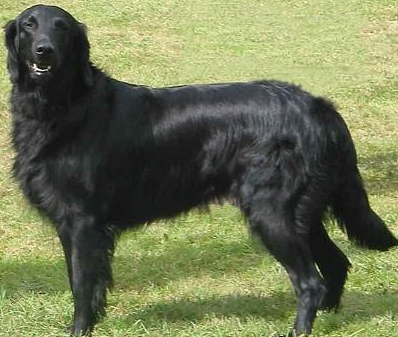

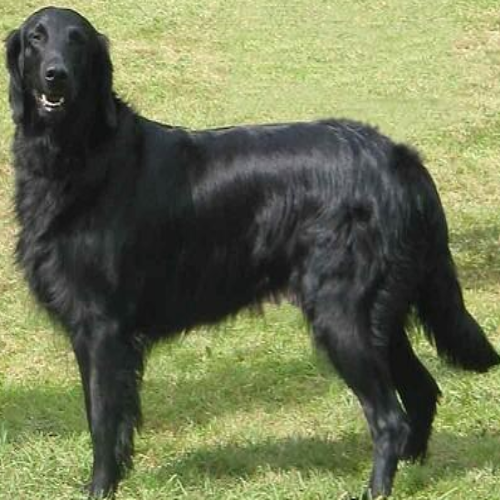

True

In [24]:
dst = cv2.resize(img, dsize=(500,500))
cv2_imshow(img)
cv2_imshow(dst)

# cv2.imwrite('/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever/1.jpg',dst)

In [26]:
def img_resize(file_path, save_path):
  file = os.listdir(file_path)

  for img_name in file:
    img = cv2.imread(f'{file_path}/{img_name}')
    dst = cv2.resize(img, dsize=(500,500))
    # save
    cv2.imwrite(f'{save_path}/{img_name}',dst)
  
# normal
nor_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_정상'
nor_save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever'
img_resize(nor_file_path, nor_save_path)

# fat
fat_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/Dog_Pic/학습할 이미지/리트리버/리트리버_비만'
fat_save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/fat_retriever'
img_resize(fat_file_path, fat_save_path)

## 파일명 재정의
- resize후 쓰레기 파일 필터링한 후 파일명 재정의 

In [9]:
### 파일명 재정의
## 정상
nar_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever'
nor_file_list = os.listdir(nar_file_path)

i = 0
for fn in nor_file_list:
  i += 1
  old_name_path = f'{nar_file_path}/{fn}'
  new_name_path = f'{nar_file_path}/{i}.jpg'
  os.rename(old_name_path, new_name_path)

## 비만
fat_file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/fat_retriever'
fat_file_list = os.listdir(fat_file_path)

i = 0
for fn in fat_file_list:
  i += 1
  old_name_path = f'{fat_file_path}/{fn}'
  new_name_path = f'{fat_file_path}/{i}.jpg'
  os.rename(old_name_path, new_name_path)

In [10]:
print(len(nor_file_list))
print(len(fat_file_list))

579
408


# 이미지 처리

## 이미지 흑백 처리

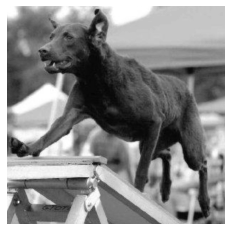

(500, 500)

In [11]:
# 흑백으로
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever/1.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
plt.imshow(image, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()
type(image) # 데이터 타입을 확인
image # 이미지 데이터를 확인
image.shape # 차원을 확인 (해상도)

## 이미지 투명도 처리
- 이미지를 흐리게 하기 위해 픽셀을 주변 픽센의 평균값으로 변환
- 커널의 크기가 클수록 이미지가 더 부드러워짐
  - 커널 : 주변 픽셀에 수행되는 연산을 수학적으로 이르는 말
  - 커널의 크기는 흐림의 정도 (커널의 크기가 클수록 이미지가 더 부드러워짐)
- 커널은 이미지를 선명하게 하는 것부터 경계선 감지까지 이미지 처리 작업을 하는데 널리 사용됨

--------------------------------------------------------
- 이미지를 흐리게 한 후 가우시안 블러를 적용한게 효과있어보임

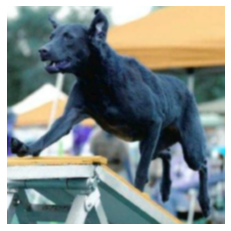

In [93]:
# 이미지 투명도 처리
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever/1.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
#각 픽셀 주변의 5X5커널 평균값으로 이미지를 흐리게 함
image_blurry = cv2.blur(image, (5,5))
plt.imshow(image_blurry, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()


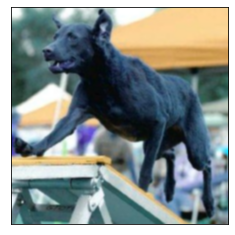

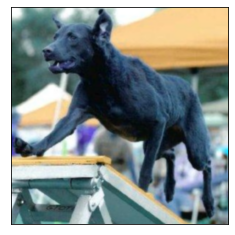

In [94]:
kernel = np.ones((5,5)) / 25.0 # 커널 생성
kernel # 커널 확인
image_kernel = cv2.filter2D(image, -1, kernel) # 커널 적용
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

##### good!
image_very_blurry = cv2.GaussianBlur(image, (5,5), 0) # 가우시안 블러를 적용
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

In [95]:
####  모든 이미지 가우시안 블러 적용  ####
def GaussianBlur(name, file_path, save_path):
  file = os.listdir(file_path)

  for img_name in file:
    image = cv2.imread(f"{file_path}/{img_name}")
    #각 픽셀 주변의 5X5커널 평균값으로 이미지를 흐리게 
    image_very_blurry = cv2.GaussianBlur(image, (5,5), 0) # 가우시안 블러를 적용
    cv2.imwrite(f'{save_path}/GaussianBlur_{name}_{img_name}',image_very_blurry)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/GaussianBlur/GaussianBlur_nor'
GaussianBlur(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/fat_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/GaussianBlur/GaussianBlur_fat'
GaussianBlur(name,file_path, save_path)

In [90]:
####  모든 이미지 흑백처리 후 가우시안 블러 적용  ####
def Grayscale_GaussianBlur(name, file_path, save_path):
  file = os.listdir(file_path)

  for img_name in file:
    image = cv2.imread(f"{file_path}/{img_name}", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
    #각 픽셀 주변의 5X5커널 평균값으로 이미지를 흐리게 
    image_very_blurry = cv2.GaussianBlur(image, (5,5), 0) # 가우시안 블러를 적용
    cv2.imwrite(f'{save_path}/Grayscale_GaussianBlur_{name}_{img_name}',image_very_blurry)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/Graysclae_GaussianBlur/Grayscale_GaussianBlur_nor'
Grayscale_GaussianBlur(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/fat_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/Graysclae_GaussianBlur/Grayscale_GaussianBlur_fat'
Grayscale_GaussianBlur(name,file_path, save_path)

## 이미지 선명하게

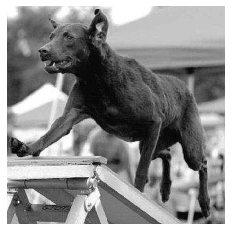

In [67]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever/1.jpg",cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]]) # 커널을 만듦

# 이미지를 선명하게 만듦
image_sharp = cv2.filter2D(image, -1, kernel)

plt.imshow(image_sharp, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

In [69]:
#### 모든 이미지 선명하게 
def sharp(name, file_path, save_path):
  file = os.listdir(file_path)

  for img_name in file:
    image = cv2.imread(f"{file_path}/{img_name}") 
    kernel = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]]) # 커널 생성
    # 이미지를 선명하게 만듦
    image_sharp = cv2.filter2D(image, -1, kernel)
    # save
    cv2.imwrite(f'{save_path}/sharp_{name}_{img_name}',image_sharp)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/Sharp/Sharp_nor'
sharp(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/fat_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/Sharp/Sharp_fat'
sharp(name,file_path, save_path)

In [52]:
#### 모든 이미지 흑백 처리 후 선명하게 
def Grayscale_sharp(name, file_path, save_path):
  file = os.listdir(file_path)

  for img_name in file:
    image = cv2.imread(f"{file_path}/{img_name}",cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
    kernel = np.array([[0, -1, 0],
                    [-1, 5,-1],
                    [0, -1, 0]]) # 커널 생성
    # 이미지를 선명하게 만듦
    image_sharp = cv2.filter2D(image, -1, kernel)
    # save
    cv2.imwrite(f'{save_path}/Grayscale_sharp_{name}_{img_name}',image_sharp)

## 정상
name = 'nor'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/nor_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/Grayscale_sharp/Grayscale_sharp_nor'
Grayscale_sharp(name,file_path, save_path)

## 비만
name = 'fat'
file_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/fat_retriever'
save_path = '/content/drive/MyDrive/멀티캠퍼스/3조/이경희/Grayscale_sharp/Grayscale_sharp_fat'
Grayscale_sharp(name,file_path, save_path)

## 색상 구분
- 이미지에서 한 색상을 구분하기 위해서는 색 범위를 정의하고 이미지에 마스크를 적용함
-  이미지를 HSV(색상, 채도, 명도)로 변환 -> 격리시킬 값의 범위를 정의 -> 이미지에 적용할 마스크를 만듦
- bitwise_and()는 마스크를 적용하고 원하는 포맷으로 변환



## 이미지 이진화
- 이미지 이진화(임계처리)thresholding은 어떤 값보다 큰 값을 가진 픽셀을 흰색으로 만들고 작은 값을 가진 픽셀은 검은색으로 만드는 과정
- 적응적 이진화(임계처리)adaptive thresholding은 픽셀의 임계값이 주변 픽셀의 강도에 의해 결정됨
- 이진화는 이미지 안의 영역 마다 빛 조건이 달라질 때 도움이 됩니다.
- adaptiveThreshold()의 max_output_value매개변수는 출력 픽셀 강도의 최대값을 결정
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C는 픽셀의 임계값을 주변 픽셀 강도의 가중치 합으로 설정
- cv2.ADAPTIVE_THRESH_MEAN_C는 픽셀의 임계값을 주변 픽셀의 평균으로 설정


## 경계선 감지
- 캐니(Canny) 경계선 감지기와 같은 경계선 감지 기술 사용
- 경계선 감지는 컴퓨터 비전의 주요 관심 대상이며 경계선은 많은 정보가 담긴 영역입니다.
- 경계선 감지를 사용하여 정보가 적은 영역을 제거하고 대부분의 정보가 담긴 이미지 영역을 구분할 수 있습니다.
- 캐니 감지기는 그레이디언트 임계값의 저점과 고점을 나타내는 두 매개변수가 필요합니다.
- 낮은 임계값과 높은 임계값 사이의 가능성 있는 경계선 픽셀은 약한 경계선 픽셀로 간주됩니다
- OpenCV의 Canny 함수는 낮은 임곗값과 높은 임곗값이 필수 매개변수입니다.
- Canny를 전체 이미지 모음에 적용하기 전에 몇 개의 이미지를 테스트하여 낮은 임계값과 높은 임곗값의 적절한 쌍
을 찾는 것이 좋은 결과를 만듭니다.
- 예제 실습은 낮은 임곗값과 높은 임곗값을 이미지 중간 픽셀 강도의 1표준편차 아래 값과 위 값으로 설정

------------------------------------------------------------
- 이것도 그닥 적합하지 않아보임

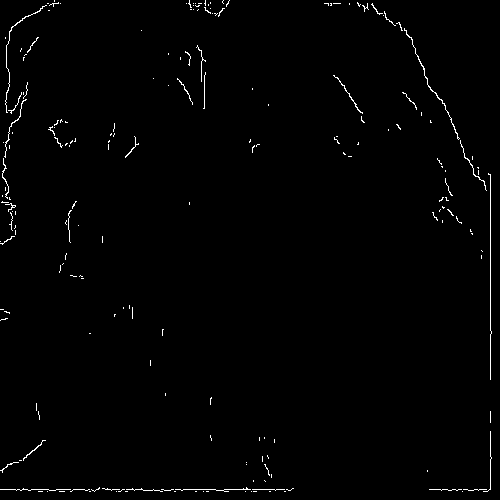

In [363]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_gray = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/fat_retriever/397.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
median_intensity = np.median(image_gray) # 픽셀 강도의 중간값을 계산

# 중간 픽셀 강도에서 위아래 1 표준 편차 떨어진 값을 임계값으로 지정합니다.
lower_threshold = int(max(0, (1.0 - 0.01) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.01) * median_intensity))

# 캐니 경계선 감지기를 적용합니다.
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# plt.imshow(image_canny, cmap="gray"), plt.axis("off") # 이미지 출력
# plt.show()
cv2_imshow(image_canny)

## 모서리 감지
- 파라미터 조정 및 여러 방법으로 전처리 시도 중

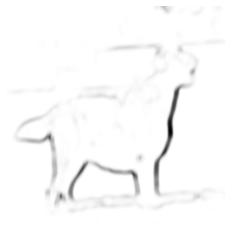

In [45]:
## 
image_bgr = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/이경희/retriever_resize/fat_retriever/5.jpg") 
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)  # 흑백으로 변경
image_gray = np.float32(image_gray)

block_size = 15 # 모서리 감지 매개변수를 설정
aperture = 29
free_parameter = 10


detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter) # 모서리를 감지
detector_responses = cv2.dilate(detector_responses, None) # 모서리 표시를 부각시킴
# 가능성이 높은 모서리를 출력
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:489: RuntimeWarning: overflow encountered in add
  A_resampled += a_min


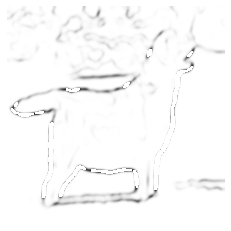

In [49]:
# 선명하게 한 후 모서리 감지
image_bgr = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/이경희/Sharp/Sharp_fat/sharp_fat_7.jpg") # 흑백 이미지 로드
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

block_size = 10 # 모서리 감지 매개변수를 설정
aperture = 29
free_parameter = 20


detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter) # 모서리를 감지
detector_responses = cv2.dilate(detector_responses, None) # 모서리 표시를 부각시킴
# 가능성이 높은 모서리를 출력
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:489: RuntimeWarning: overflow encountered in add
  A_resampled += a_min


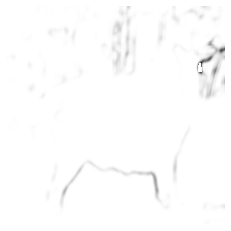

In [50]:
# GausianBlur 처리 후 
image_bgr = cv2.imread("/content/drive/MyDrive/멀티캠퍼스/3조/이경희/GaussianBlur/GaussianBlur_fat/GaussianBlur_fat_6.jpg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY) # 흑백으로 변경
image_gray = np.float32(image_gray)

block_size = 12 # 모서리 감지 매개변수를 설정
aperture = 29
free_parameter = 10


detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter) # 모서리를 감지
detector_responses = cv2.dilate(detector_responses, None) # 모서리 표시를 부각시킴
# 가능성이 높은 모서리를 출력
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()